In [1]:
prior = function(p){
  if((p<0) || (p>1)){  # || here means "or"
    return(0)}
  else{
    return(1)}
}

likelihood = function(p, nAA, nAa, naa){
  return(p^(2*nAA) * (2*p*(1-p))^nAa * (1-p)^(2*naa))
}

psampler = function(nAA, nAa, naa, niter, pstartval, pproposalsd){
  p = rep(0,niter)
  p[1] = pstartval
  for(i in 2:niter){
    currentp = p[i-1]
    newp = currentp + rnorm(1,0,pproposalsd)
    A = prior(newp)*likelihood(newp,nAA,nAa,naa)/(prior(currentp) * likelihood(currentp,nAA,nAa,naa))
    if(runif(1)<A){
      p[i] = newp       # accept move with probabily min(1,A)
    } else {
      p[i] = currentp        # otherwise "reject" move, and stay where we are
    }
  }
  return(p)
}

In [2]:
z=psampler(50,21,29,10000,0.5,0.01)

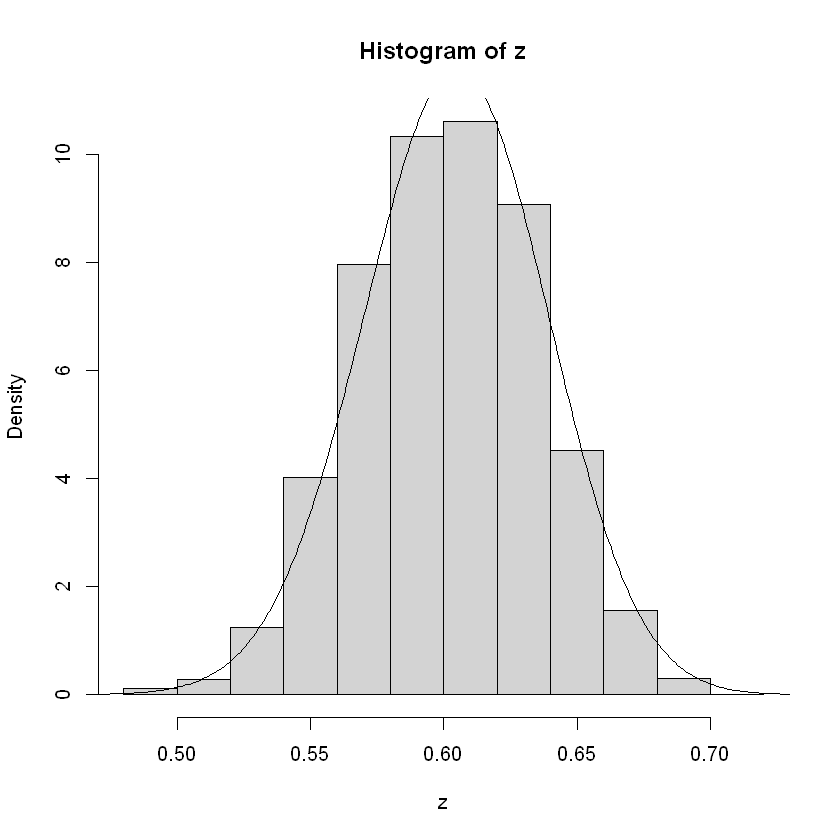

In [3]:
x=seq(0,1,length=1000)
hist(z,prob=T)
lines(x,dbeta(x,122, 80))  # overlays beta density on histogram